# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

**План и цели иследования**

- **Шаг 1.** Откроем файл с данными и изучим общую информацию
- **Шаг 2.** Предобработка данных
- **Шаг 3.** Добавим в таблицу новые столбцы со следующими параметрами:
- **Шаг 4.** Проведем исследовательский анализ данных:
- **Шаг 5.** Напишим общий вывод. Опишем полученные результаты и зафиксируем основной вывод проведённого исследования.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sbn
import warnings

warnings.filterwarnings('ignore')

In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t') # Открываем датасет с разделитем 
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


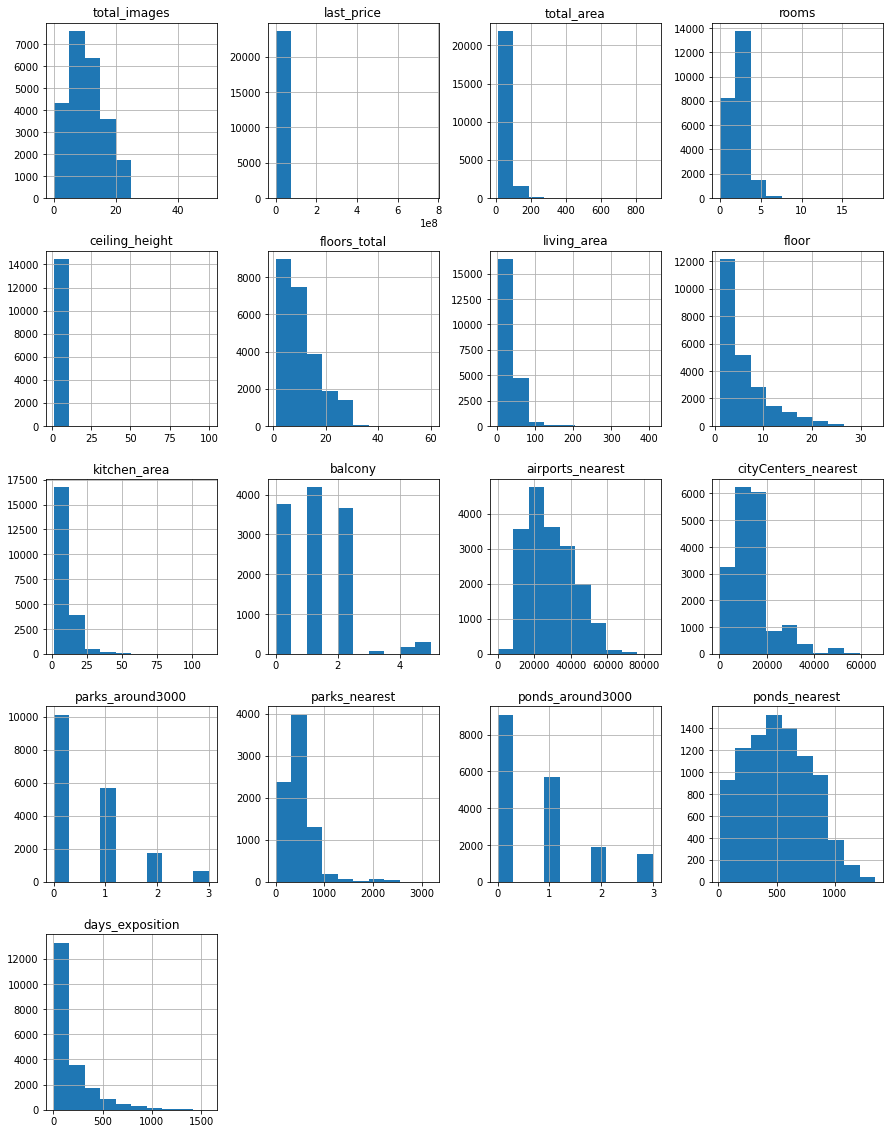

In [4]:
data.hist(figsize=(15, 20));


### Предобработка данных

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Видим наличие пропусков в столбцах:**
- `ceiling_height` (высота потолков (м))
- `floors_total` (всего этажей в доме)
- `living_area`  (жилая площадь в квадратных метрах (м²))
- `is_apartment` (апартаменты (булев тип))
- `kitchen_area` (площадь кухни в квадратных метрах (м²))
- `balcony` (число балконов)
- `locality_name` (название населённого пункта)
- `airports_nearest` (расстояние до ближайшего аэропорта в метрах (м))
- `cityCenters_nearest` (расстояние до центра города (м))
- `parks_around3000` (число парков в радиусе 3 км)
- `parks_nearest` (расстояние до ближайшего парка (м)) 
- `ponds_around3000` (число водоёмов в радиусе 3 км)
- `ponds_nearest` (асстояние до ближайшего водоёма (м)) 
- `days_exposition` (сколько дней было размещено объявление (от публикации до снятия))

**Обработаем значения в столбце 'balcony'**

Скорее всего пропуск в столбце 'balcony' является отсуствием балкона, поэтому произвел замену на 0 и замени тип ячейки на целое число

In [7]:
data['balcony'].fillna(0,inplace = True)
data['balcony'] = data['balcony'].astype(int)

**Обработаем значения в столбце locality_name**

Восстановить имя городов, в которых находятся квартиры не представляется возможным, поэтому будет логично объединить их в одну группу "unknown", так же провел работу над неявными дубликатами

In [8]:
data['locality_name'].fillna('unknown', inplace=True)

In [9]:
data['locality_name'] = data['locality_name'].str.lower()

In [10]:
for i in data['locality_name'].unique().tolist():
    data.loc[data['locality_name'] == i, 'locality_name'] = i.split()[-1]

In [11]:
data['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'бор', 'гатчина', 'фёдоровское', 'выборг',
       'кронштадт', 'кировск', 'девяткино', 'металлострой', 'лебяжье',
       'сиверский', 'молодцово', 'кузьмоловский', 'ропша', 'павловск',
       'пикколово', 'всеволожск', 'волхов', 'кингисепп', 'приозерск',
       'сестрорецк', 'куттузи', 'аннино', 'ефимовский', 'плодовое',
       'заклинье', 'торковичи', 'первомайское', 'село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'свет', 'сланцы', 'путилово',
       'ивангород', 'шлиссельбург', 'никольское', 'зеленогорск', 'оржицы',
       'кальтино', 'романовка', 'бугры', 'рощино', 'кириши', 'луга',
       'волосово', 'отрадное', 'павлово', 'оредеж', 'копорье',
       'молодёжное', 'тихвин', 'победа', 'нурма', 'синявино', 'тосно',
       'стрельна', 'бокситогорск', 'александровская', 'лопухинка',
       'пикалёво', 'терв

In [12]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Обработаем значения в столбце 'ceiling_heaight'**

Заменяем пропщуенные значения, на медианное значение подходящего населенного пункта. Так же постараемся по максимому избавиться от аномальных значений.

In [13]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [14]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == t), 'ceiling_height'].median()

In [15]:
print(data['ceiling_height'].unique())
print('Оставшееся количесвто пропусков', data['ceiling_height'].isna().sum())

[  2.7     2.63    3.03    2.65    2.64    2.5     2.67    2.55    2.6
   2.56    3.05    2.75    2.9     2.56    2.8     3.      3.2     2.61
   2.51      nan   3.25    3.45    2.77    2.85    2.57    4.15    3.5
   3.3     2.71    4.      2.47    2.73    2.84    3.1     2.34    3.4
   2.52    3.06    2.72    2.54    2.78    2.65    2.76   25.      2.58
   3.7     5.2     2.575   2.87    2.66    2.59    2.      2.45    3.6
   3.9     2.92    3.11    3.13    3.8     3.15    3.55    3.16    3.62
   3.12    2.53    2.74    2.96    2.46    5.3     5.      2.79    2.95
   4.06    2.94    3.82    3.54    3.53    2.83    4.7     2.4     3.38
   3.01    5.6     3.65    3.18    3.35    2.3     2.525   3.57    2.48
   2.62    2.82    3.98    2.875   3.83   27.      3.52    3.95    3.75
   2.88    3.67    3.87    3.66    3.85    3.86    4.19    3.24    4.8
   4.5     4.2     3.36   32.      3.08    3.68    3.07    3.37    3.09
   8.      3.26    3.34    2.81    3.44    2.97    3.14    4.37    2.

Осталось 87 пропусков, очень маленький процент от общей картины, удалю строки с оставшимеся пропусками

In [16]:
data.dropna(subset=['ceiling_height'], inplace=True, axis=0)

In [17]:
data = data.reset_index(drop=True)
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data.loc[data['ceiling_height'] > 20, 'ceiling_height'] / 10

In [18]:
len(data[data['ceiling_height'] < 2.1])

14

In [19]:
#По госту высота потолков в квартирах не может быть меньше чем 2.1 метр, удалим строки которые не соотвествуют госту.
data = data.query('ceiling_height > 2')

**Обработаем значения в столбце 'is_apartment'**

Скорее всего при заполнении люди у кого не аппартаменты, не стали указывать это значение, логичнее будет заполнить пропуски значениями "False" и сразу заменим тип ячейки на булево значение.

In [20]:
data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'] = data['is_apartment'].astype(bool)

**Обработаем значения в столбце 'floors_total'**

Исправим пропуски в общем количестве этажей. В данном случае удаление не повлечет за собой больших последствий, так как таких объектов всего 86 из 23699, что меньше чем 0.5 процента от общей выборки(~0.3%)

In [21]:
data.dropna(subset=["floors_total"],inplace = True,axis = 0 )
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.00,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.63,11.0,18.6,1,False,...,11.00,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,False,...,8.30,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,14.0,NaN,9,False,...,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.00,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23507,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,False,...,8.00,0,петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23508,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,13.83,0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23509,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.0,4,False,...,8.50,0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23510,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,False,...,23.30,2,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


**Обработаем значения в столбцах 'living_area' и 'kitchen_area'**

Посчитаем долю среднего значения жилой и кухонной площади от общей площади и заменим пропуски соотношением

In [22]:
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

In [23]:
print("Количество пропусков жилой площади:", data['living_area'].isna().sum())
print('Количество пропусков кухонной площади:', data['kitchen_area'].isna().sum())

Количество пропусков жилой площади: 0
Количество пропусков кухонной площади: 0


**Обработаем значения в столбцах 'cityCenters_nearest' и 'airports_nearest'**

Заменим пропуски средним значением по населенным пунктам.

In [24]:
data['cityCenters_nearest'].isna().sum()

5418

In [25]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    data.loc[(data['locality_name'] == t), 'cityCenters_nearest'].mean()

In [26]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == t), 'airports_nearest'].mean()

In [27]:
print('Оставшееся количество пропусков в cityCenters_nearest:', data['cityCenters_nearest'].isna().sum())
print('Оставшееся количество пропусков в airports_nearest:', data['airports_nearest'].isna().sum())

Оставшееся количество пропусков в cityCenters_nearest: 5341
Оставшееся количество пропусков в airports_nearest: 5341


In [28]:
print('Пропуски в Питере по столбцу cityCenters_nearest:',data.query('"санкт-петербург" in locality_name')['cityCenters_nearest'].isna().sum())
print('Пропуски в Питере по столбцу airports_nearest:',data.query('"санкт-петербург" in locality_name')['airports_nearest'].isna().sum())


Пропуски в Питере по столбцу cityCenters_nearest: 0
Пропуски в Питере по столбцу airports_nearest: 0


Данные рассчитывала система. Они могут отустствовать по причине того, что относительно конкретно взятого населенного пункта/точки искались расстояние в определенном радиусе. Если в пределах этого радиуса ни аэропорта, ни парков не было, то и указать в этом столбце системе было нечего. Как мы видим такие проблемы отсутствуют в городе Санкт-Петербург, оставим пропуски, но будем их учитывать в дальнейшем анализе

**Обработаем значения в столбцах 'parks_nearest' и 'ponds_nearest'**

Вполне возможно, что данные просто не были заполнены. Беря в расчет то, что это далеко не самые важные параметры, и отсутствие возможности проставить какое-либо адекватные расстояние, которое не испортит статистику по уже присутствующим данным по этим столбцам, предлагаю здесь не трогать пропуски, учитывая, что есть достаточное количество строк, где данные присутствуют, и по ним можно сделать срез и заметить определенные тенденции

In [29]:
print('Количество пропусков parks_nearest:', data['parks_nearest'].isna().sum())
print('Количество пропусков ponds_nearest:', data['ponds_nearest'].isna().sum())

Количество пропусков parks_nearest: 15470
Количество пропусков ponds_nearest: 14457


**Обработаем значения в столбцах 'parks_around3000' и 'ponds_around3000'**

Это далеко не самая важная информация, поэтому могу предположить, что пропуски в этих столбцах означают, что в данных пределах отсуствуют парки и пруды, заменим пропущенные значения на 0. Так же изменим значения ячеек на целое число

In [30]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

**Обработаем значения в столбце 'days_exposition'**

Восстановить данные о длительности размещения не представляется возможным, поэтому заменим их на 0.

In [31]:
data['days_exposition'] = data['days_exposition'].fillna(0)

**Перед тем, как приступить к следующему шагу, изменим тип нескольких столбцов**

- `first_day_exposition` - изменим на тип datetime
- `floors_total` - изменим тип на int
- `days_exposition` - изменим тип на int
- `last_price` - изменим тип на int

In [32]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['floors_total'] = data['floors_total'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)
data['last_price'] = data['last_price'].astype(int)

In [33]:
data.duplicated().sum()

0

**Вывод:**

Данные которые изначально были нам данны, имели множество пропусков, неявных дубликатов и аномалий. Сначала я избавился от пропусков, изменил типы данных, убрал неявные дубликаты и где смог исправил аномалии. Явных дубликатов нет.

### Посчитайте и добавьте в таблицу новые столбцы

**Добавим столбец `price_square_meter` -  цена за квадратный метр и округлим количество знаков после запятой до 2.**

In [34]:
data['price_square_meter'] = round(data['last_price'] / data['total_area'], 2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00000,8,False,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370.37
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.60000,1,False,...,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.30000,4,False,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71
3,0,64900000,159.0,2015-07-24,3,2.70,14,90.79153,9,False,...,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00000,13,False,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00


**Добавим столбцы:**

- `day_on_week_exposition` - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- `month_exposition` - месяц публикации объявления;
- `year_exposition` - год публикации объявления;

In [35]:
data['day_on_week_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_on_week_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00000,8,False,...,16028.0,1,482.0,2,755.0,0,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.60000,1,False,...,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.30000,4,False,...,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.70,14,90.79153,9,False,...,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00000,13,False,...,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018


**Добавим столбец `type_floor` - тип этажа квартиры (значения — «первый», «последний», «другой»)**

In [36]:
#создаем функцию которая поделит строки на 3 категории:

def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floors_total'] == row['floor']:
        return 'последний'
    else:
        return 'другой'

In [37]:
data['type_floor'] = data.apply(floor_category, axis=1) 

**Добавим столбец `cityCenters_nearest_kilometer` - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)**

In [38]:
data['cityCenters_nearest_kilometer'] = round(data['cityCenters_nearest'] / 1000)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_on_week_exposition,month_exposition,year_exposition,type_floor,cityCenters_nearest_kilometer
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00000,8,False,...,482.0,2,755.0,0,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.60000,1,False,...,NaN,0,NaN,81,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.30000,4,False,...,90.0,2,574.0,558,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.70,14,90.79153,9,False,...,84.0,3,234.0,424,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00000,13,False,...,112.0,1,48.0,121,100000.00,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

**Изучим общую площадь**

count    23512.000000
mean        60.390836
std         35.707224
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

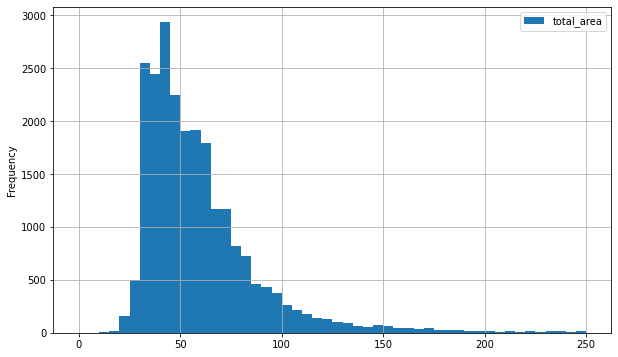

In [39]:
data.plot(y='total_area', kind='hist', bins=50, grid=True, figsize=(10,6), range=(0,250))
data['total_area'].describe()

На гистограме и в описании `total_area` мы видим, что в основном площадь квартиры находится в области около `40-50` кв.м.
Минимальная площадь `12` кв.м, максимальная `900` кв.м. Медианное значение `52` кв.м. 

**Изучим жилую площадь и площадь кухни**

count    23512.000000
mean        34.629260
std         22.402651
min          2.000000
25%         19.000000
50%         30.000000
75%         42.200000
max        409.700000
Name: living_area, dtype: float64

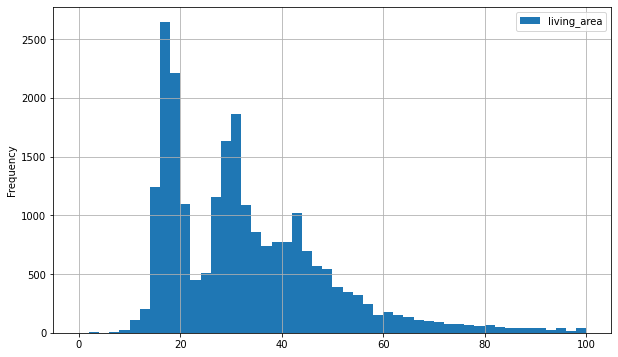

In [40]:
data.plot(y='living_area', kind='hist', bins=50, grid=True, figsize=(10,6), range=(0,100))
data['living_area'].describe()

count    23512.000000
mean        10.512449
std          6.049257
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

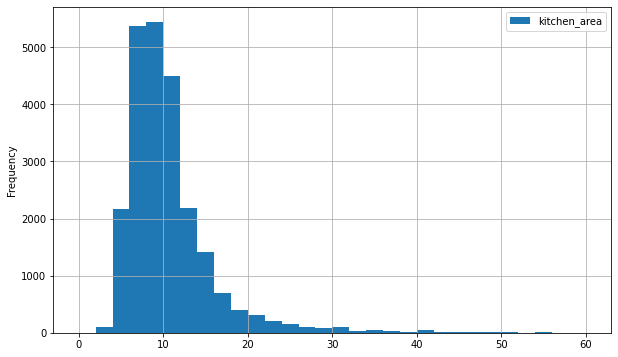

In [41]:
data.plot(y='kitchen_area', kind='hist', bins=30, grid=True, figsize=(10,6), range=(0,60))
data['kitchen_area'].describe()

**Вывод по жилой площади**

Большой всплеск квартир с жилой площадью `15-20` кв.м и чуть меньший всплеск в районе `25-30` кв.м. Смущает минимальная квадратура жилой площади `2` кв.м

**Вывод по кухонной площади**

В основном площадь кухонь располагается в районе `5-12` кв.м. Так же смущает минимальная квадратура кухни `1,3` кв.м, но здесь этому есть объяснение, возможно это кухонная зона в студии.



**Изучим цену объектов**

count    23512.000000
mean         6.560461
std         10.920463
min          0.012190
25%          3.450000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price_million, dtype: float64

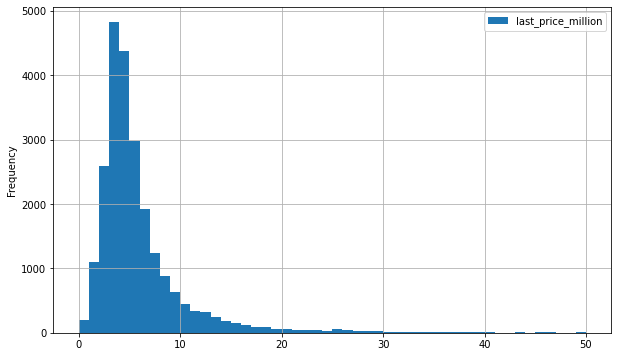

In [42]:
#Создам дополнительный столбец в котором цена будеn указана в миллионах
data['last_price_million'] = data['last_price'] / 1000000
data.plot(y = 'last_price_million', kind = 'hist', bins = 50, grid=True, range = (0,50), figsize = (10,6))
data['last_price_million'].describe()

Большинство квартир в районе `4` млн.руб. после `4` млн. руб. наблюдается тендцения на падение кол-ва квартир, в некоторых областях есть незначительное возвышение. В среднем цена на квартиру `6.5` млн.руб. Квартиру за `763` млн.руб. (максимальная цена) в интернете я найти смог для утверждения, а вот дешевой квартиры с ценой `120` тыс.руб. (минимальная цена) не смог, с этим вопросом следует обрадиться к сотрудникам предоставившим данные.


**Изучим количество комнат**

count    23512.000000
mean         2.072048
std          1.079463
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

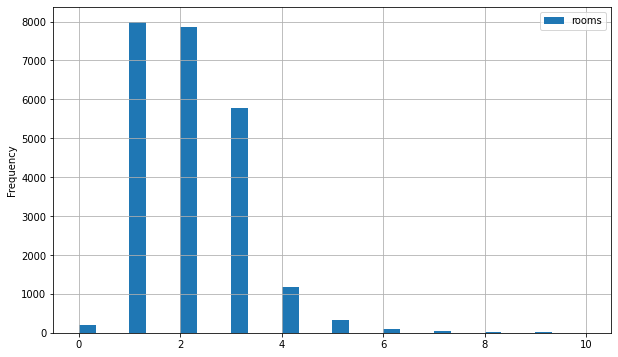

In [43]:
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, range = (0,10), figsize = (10,6))
data['rooms'].describe()

Большая часть квартир являются однокомнатными и двукомнатными, с увеличением количества комнат, уменьшается количество квартир

**Изучим высоту потолков**

count    23512.000000
mean         2.707118
std          0.280938
min          2.200000
25%          2.550000
50%          2.700000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

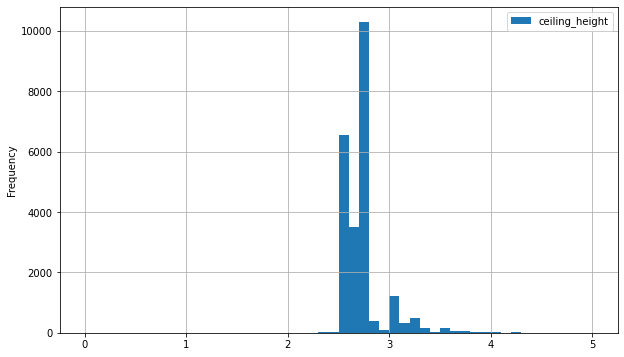

In [44]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 50, grid=True, range = (0,5), figsize = (10,6))
data['ceiling_height'].describe()



(0.0, 20.0)

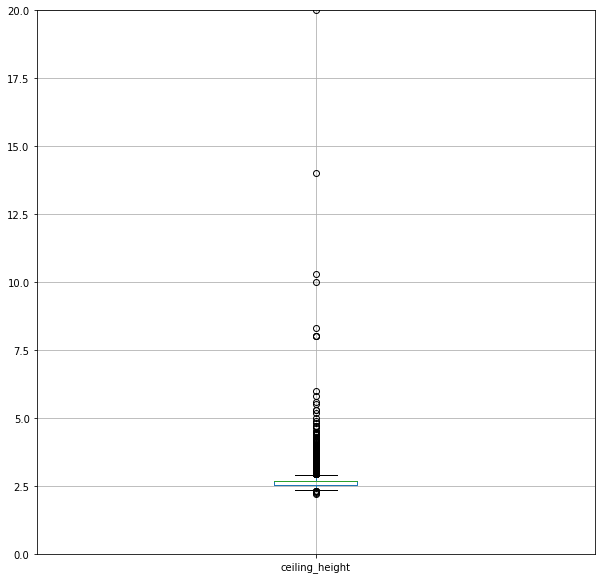

In [45]:
data.boxplot('ceiling_height', figsize=(10,10))
plt.ylim(0, 20)


Высота потолков в среднем составляет 2,71 м и очень близка к медиане 2,7 м.

**Изучим этажность квартир**

count    23512.000000
mean         5.889716
std          4.877693
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

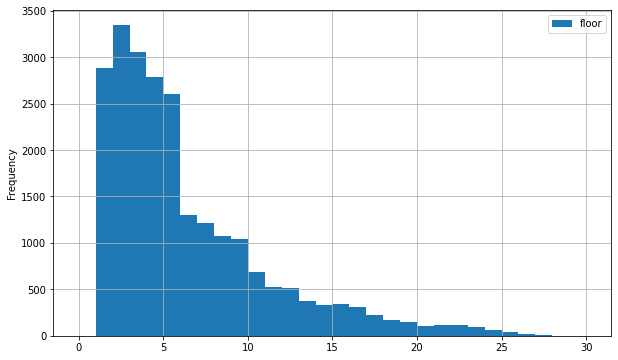

In [46]:
data.plot(y = 'floor', kind = 'hist', bins = 30, grid=True, range = (0,30), figsize = (10,6))
data['floor'].describe()

type_floor
другой       17322
первый        2884
последний     3306
Name: type_floor, dtype: int64

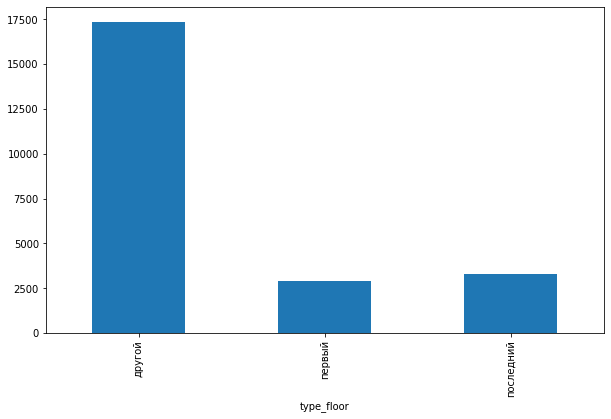

In [47]:
#Выполнил визуализацию
type_floor222 = data.groupby('type_floor')['type_floor'].count()
type_floor222.columns = ['count']
type_floor222.plot(y = 'count', kind='bar', figsize=(10,6))
type_floor222 

Чаще всего квартиры располагаются `со 2 по 6 этаж`, меньше всего квартир на `первых` этажах и чуть больше на `последних`.

**Изучим общее количество этажей в доме**

count    23512.000000
mean        10.698069
std          6.593947
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

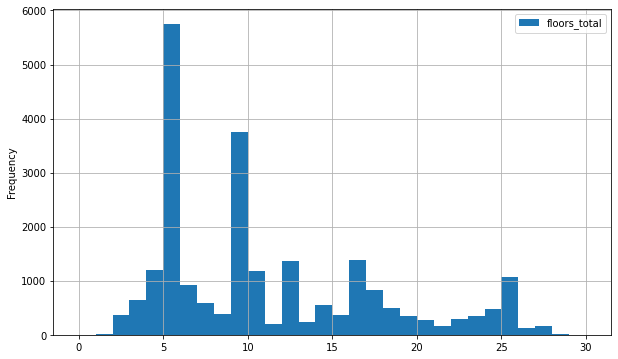

In [48]:
data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, range = (0,30), figsize = (10,6))
data['floors_total'].describe()

Больше всего `5` этажных (больше 5 тысяч) и `9` этажных домов (чуть меньше 4 тысяч)

**Изучим расстояние до центра города в метрах**

count    18171.000000
mean     14179.323800
std       8607.328942
min        181.000000
25%       9241.000000
50%      13063.000000
75%      16275.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

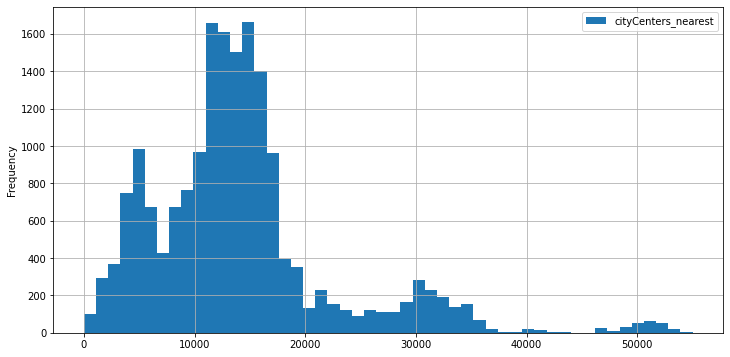

In [49]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 50, grid=True, range = (0,55000), figsize = (12,6))
data['cityCenters_nearest'].describe()

Самое большое расстояние до центра `66` тыс.м. в среднем квартиры от центра располагаются в промежутке `от 11 до 16` тыс.м. Есть те кто буквально живут в центре `181` м. 

**Изучим расстояние до ближайшего аэропорта**

In [50]:
data[data['airports_nearest'] <= 5000]['airports_nearest']

21008    0.0
Name: airports_nearest, dtype: float64

Возможно это квартира главного героя из фильма "Терминал", но для гистограммы я отложу эту строку

In [51]:
#Создал временный датафрэйм чтобы с помощью среза избавиться от аномальной строки
temporary_data = data.query('airports_nearest != 0')

count    18170.000000
mean     28782.547390
std      12595.226396
min       6450.000000
25%      18608.250000
50%      26782.500000
75%      37153.000000
max      84869.000000
Name: airports_nearest, dtype: float64

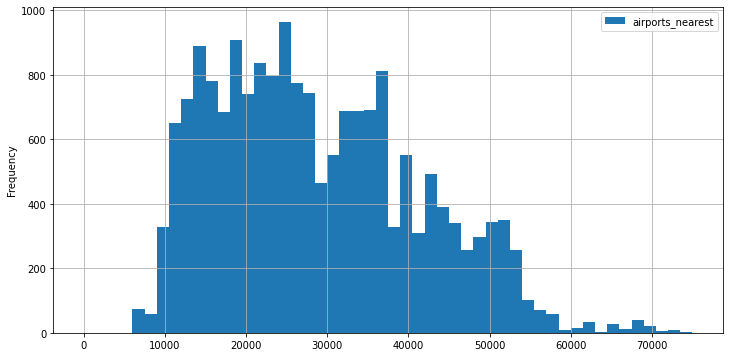

In [52]:
temporary_data.plot(y = 'airports_nearest', kind = 'hist', bins = 50, grid=True, range = (0,75000), figsize = (12,6))
temporary_data['airports_nearest'].describe()

Ближе всех к аэропорту распологается квартира на расстоянии `6.5` тыс.м., а дальше всех на расстоянии `85` тыс.м. В среднем квартиры располагаются на растоянии `29` тыс. м.

**Изучим расстояние до ближайшего парка**

count    8042.000000
mean      490.565904
std       341.392007
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

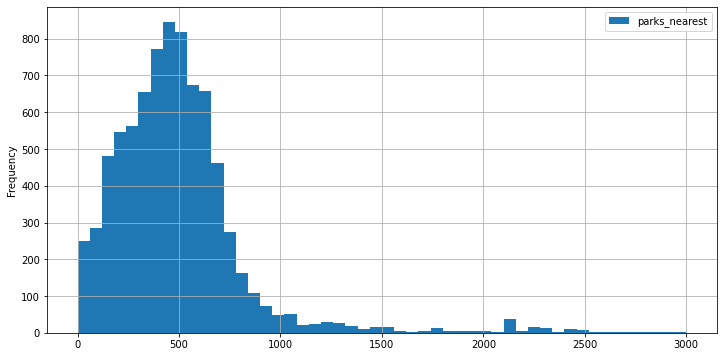

In [53]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 50, grid=True, range = (0,3000), figsize = (12,6))
data['parks_nearest'].describe()

Количество квартир расположенных в пределах `3` км. от парка `8042`. В среднем квартиры располагаются на растоянии `490` м.

**Изучим день и месяц публикации объявления**

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23512 entries, 0 to 23611
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   total_images                   23512 non-null  int64         
 1   last_price                     23512 non-null  int32         
 2   total_area                     23512 non-null  float64       
 3   first_day_exposition           23512 non-null  datetime64[ns]
 4   rooms                          23512 non-null  int64         
 5   ceiling_height                 23512 non-null  float64       
 6   floors_total                   23512 non-null  int32         
 7   living_area                    23512 non-null  float64       
 8   floor                          23512 non-null  int64         
 9   is_apartment                   23512 non-null  bool          
 10  studio                         23512 non-null  bool          
 11  open_plan      

count    23512.000000
mean         2.566647
std          1.788264
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_on_week_exposition, dtype: float64

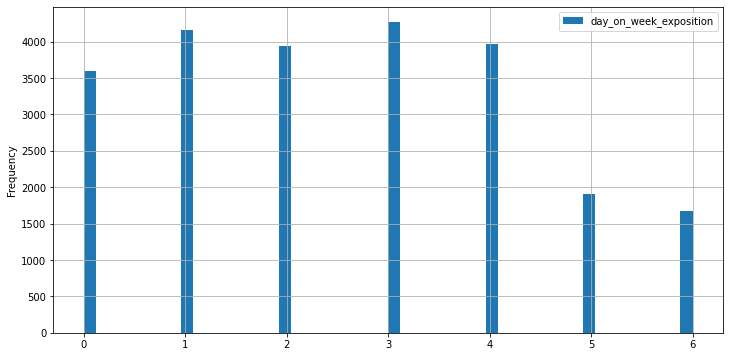

In [55]:
data.plot(y = 'day_on_week_exposition', kind = 'hist', bins = 50, grid=True, range = (0,6), figsize = (12,6))
data['day_on_week_exposition'].describe()

В `воскресенье` редко выставляют объявления, чаще всего это происходит во `вторник и четверг`. В целом по `будням` почти одинаковое распределение

count    23512.000000
mean         6.399668
std          3.492893
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

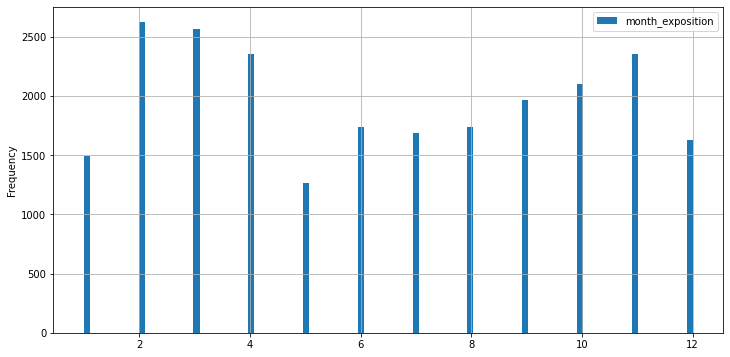

In [56]:
data.plot(y = 'month_exposition', kind = 'hist', bins = 100, grid=True, range = (1,12), figsize = (12,6))
data['month_exposition'].describe()

Чаще всего квартиры выставляли на продажу в `феврале` и `марте`, меньше всего объявлений в `мае`. В мае не до продаж, все на огородах=)

**2:**

**Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.**

Создадим временный датафрейм избавившись от 0.

In [57]:
exp_data = data.query('days_exposition != 0')

count    20363.000000
mean       181.126651
std        219.893816
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

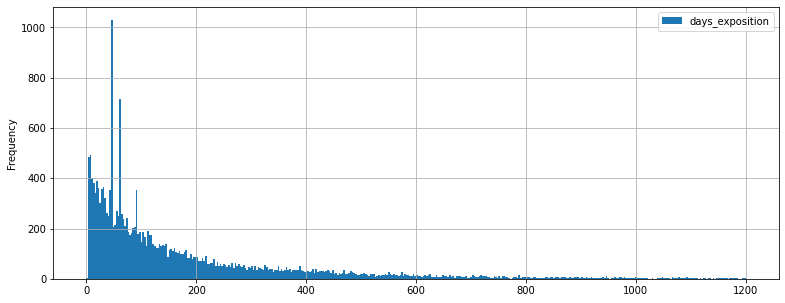

In [58]:
exp_data.plot(y = 'days_exposition', kind = 'hist', bins = 400, grid=True, range = (0,1200), figsize = (13,5))
exp_data['days_exposition'].describe()

(-10.0, 1200.0)

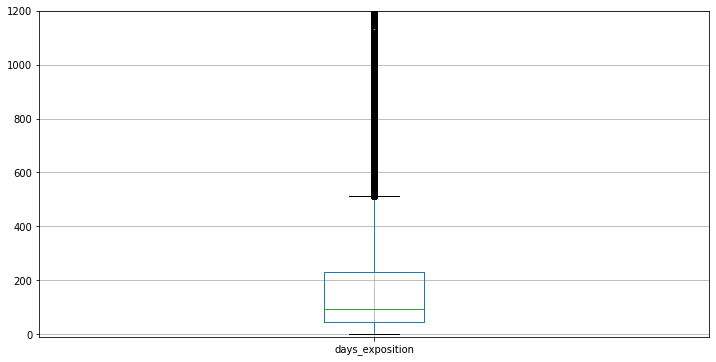

In [59]:
exp_data.boxplot('days_exposition', figsize =(12,6))
plt.ylim(-10, 1200)

В среднем объявление о продаже висит на сайте `181` день, медианное значение `95` дней. Нормальное распределение продаж от `1 до 500` дней, имеются выбросы. `1580` дней максимальное количество дней. Большая часть квартир продавалась в течение первых `50` дней, есть и квартиры, которые продавались до `года`. Чем дальше, тем реже встречаются такие случаи.

**3:**

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).


In [60]:
display(
    data[
        ['total_area','living_area','kitchen_area','rooms','day_on_week_exposition','month_exposition','year_exposition', 'last_price']
    ].corr())


,total_area,living_area,kitchen_area,rooms,day_on_week_exposition,month_exposition,year_exposition,last_price
total_area,1.000000,0.946265,0.660306,0.758362,-0.005700,0.004899,-0.079300,0.653509
living_area,0.946265,1.000000,0.502492,0.827192,-0.004914,-0.000237,-0.071786,0.585644
kitchen_area,0.660306,0.502492,1.000000,0.325174,-0.005891,0.003574,-0.059325,0.514016
rooms,0.758362,0.827192,0.325174,1.000000,-0.005550,-0.004084,-0.055299,0.363241
day_on_week_exposition,-0.005700,-0.004914,-0.005891,-0.005550,1.000000,0.012694,-0.004226,0.001621
month_exposition,0.004899,-0.000237,0.003574,-0.004084,0.012694,1.000000,-0.270129,0.002841
year_exposition,-0.079300,-0.071786,-0.059325,-0.055299,-0.004226,-0.270129,1.000000,-0.042630
last_price,0.653509,0.585644,0.514016,0.363241,0.001621,0.002841,-0.042630,1.000000


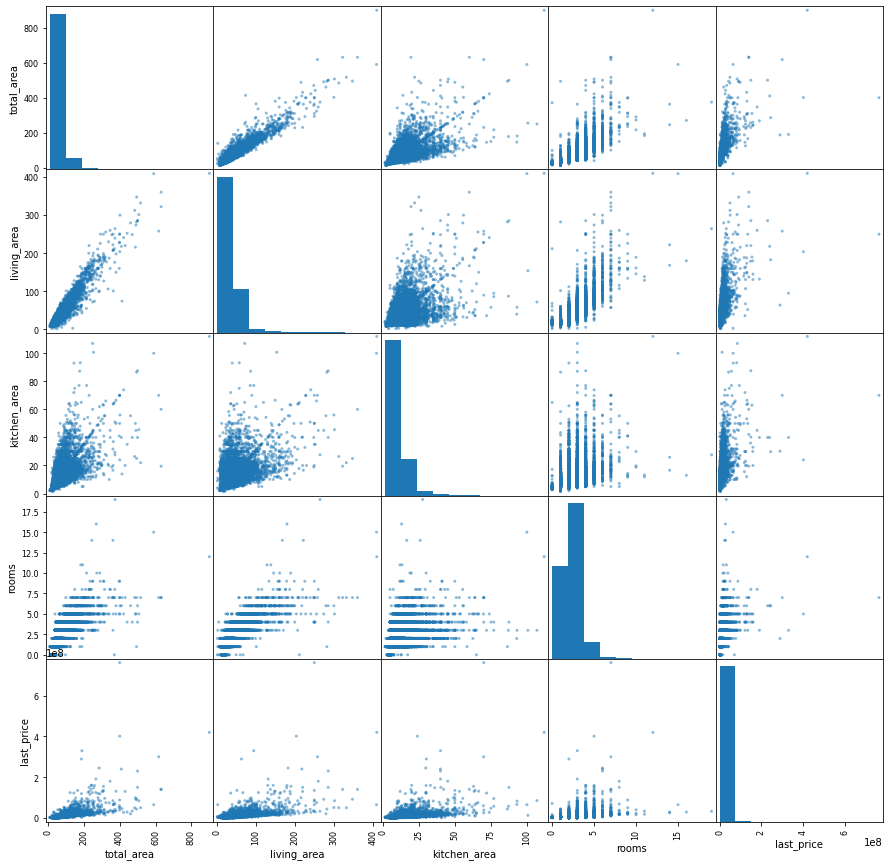

In [61]:
pd.plotting.scatter_matrix(
    data[['total_area','living_area','kitchen_area','rooms','last_price']],figsize=(15,15));

Цена зависит как от общей площади(`0.65`), так и жилой(`0.58`) и кухонной(`0.51`), в скобочках указанна кореляция относительно цены. От количества комнат тоже есть положительная зависимость, но не такая явная (`0.36`)

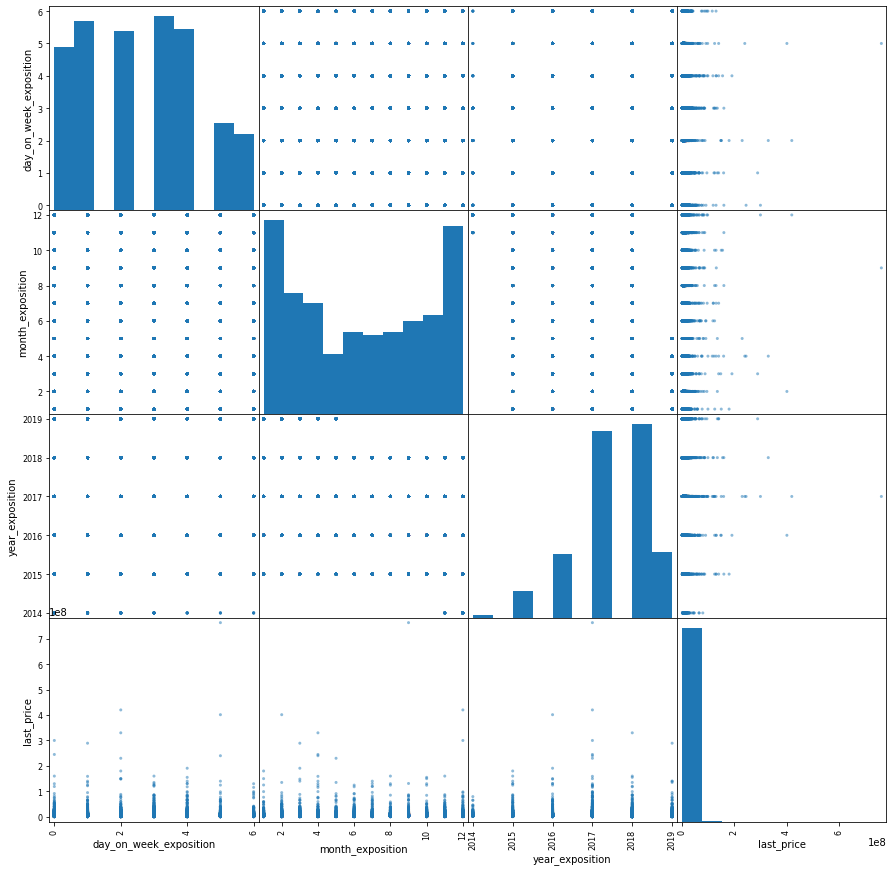

In [62]:
pd.plotting.scatter_matrix(
    data[['day_on_week_exposition','month_exposition','year_exposition', 'last_price']],figsize=(15,15));

,mean,count,median
day_on_week_exposition,,,
1,6.404005e+06,4156,4750000
2,6.652946e+06,3938,4700000
0,6.536449e+06,3590,4650000
3,6.722857e+06,4267,4650000
4,6.388250e+06,3970,4600000
5,7.008002e+06,1912,4590000
6,6.266999e+06,1679,4550000


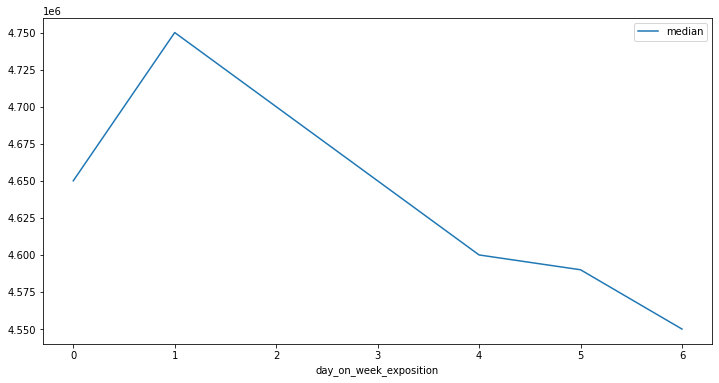

In [63]:
day_on_week_exposition_pvt = data.pivot_table(index = 'day_on_week_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
day_on_week_exposition_pvt.columns = ['mean', 'count', 'median']
day_on_week_exposition_pvt.plot(y = 'median', figsize=(12,6))

day_on_week_exposition_pvt.sort_values('median', ascending = False)

Видим, что выставленные во вторник объявления в среднем выше стоимость, но незначительно! Воскресенье стоимость самая низкая!
Полагаю, что стоимость выставленной на продажу недвижимости зависит от общей активности людей, так как именно в рабочие дни мы видим более высокие цены.

,mean,count,median
month_exposition,,,
4,6.749099e+06,2357,4800000
9,6.852090e+06,1967,4700000
11,6.468371e+06,2354,4700000
12,7.043844e+06,1631,4700000
3,6.381182e+06,2563,4690000
2,6.494356e+06,2622,4650000
7,6.666770e+06,1684,4650000
1,6.672632e+06,1494,4600000
8,6.363794e+06,1734,4600000


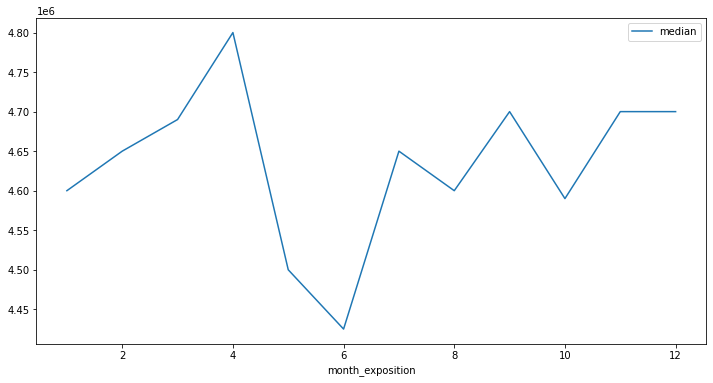

In [64]:
month_exposition_pvt = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
month_exposition_pvt.columns = ['mean', 'count', 'median']
month_exposition_pvt.plot(y = 'median', figsize=(12,6))

month_exposition_pvt.sort_values('median', ascending = False)

На рынке недвижимости, как и во многих других сферах присутствует сезонность - в начале лета мы видим наименьшее предложение как по количеству, так и по стоимости недвижимости. Наверное, это связано с отпусками. Самая высокая стоимость квартир в `апреле`! Самая низкая стоимость в `мае` и `июне`! 

,mean,count,median
year_exposition,,,
2014,1.208714e+07,137,7700000
2015,8.587923e+06,1182,5337000
2019,6.802786e+06,2856,5100000
2018,5.976737e+06,8443,4595000
2016,6.840734e+06,2756,4550000
2017,6.598586e+06,8138,4500000


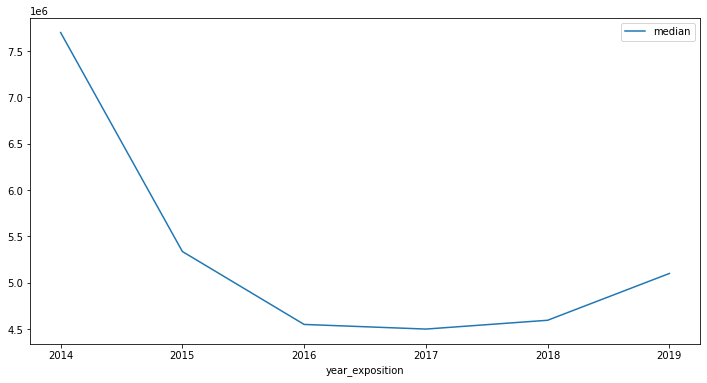

In [65]:
year_exposition_pvt = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
year_exposition_pvt.columns = ['mean', 'count', 'median']
year_exposition_pvt.plot(y = 'median', figsize=(12,6))

year_exposition_pvt.sort_values('median', ascending = False)

,mean,mean2,count,count2,median,median2
year_exposition,,,,,,
2014,1.208714e+07,86.249854,137,137,7700000,76.26
2015,8.587923e+06,71.612606,1182,1182,5337000,60.00
2019,6.802786e+06,59.531922,2856,2856,5100000,52.00
2018,5.976737e+06,57.755156,8443,8443,4595000,50.50
2016,6.840734e+06,62.171872,2756,2756,4550000,53.15
2017,6.598586e+06,60.758340,8138,8138,4500000,52.00


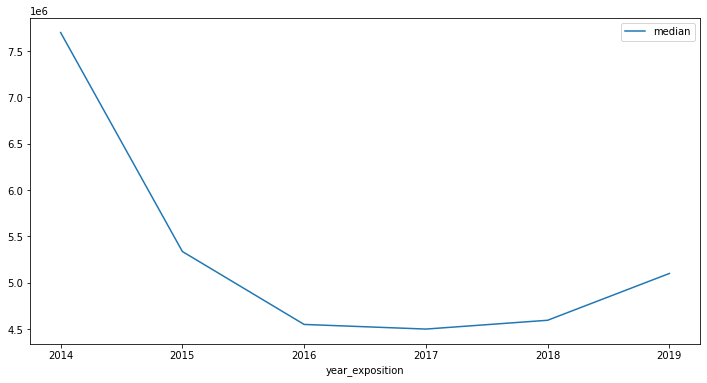

In [66]:
year_exposition_pvt2 = data.pivot_table(index = 'year_exposition', values = ['last_price', 'total_area'], aggfunc = ['mean', 'count', 'median'])
year_exposition_pvt2.columns = ['mean', 'mean2', 'count', 'count2', 'median', 'median2']
year_exposition_pvt2.plot(y = 'median', figsize=(12,6))

year_exposition_pvt2.sort_values('median', ascending = False)

Как мы видим с 2014 по 2016 год цена падала и не только цена но и общая площадь квартир тоже пошла на спад!Цена после 2017 года пошла на повышение, а квадратура зафиксировалась в среднем 52 кв.м. По факту стоимость аналогичных квартир могла себя вести абсолютно иначе от года к году!

,mean,count,median
type_floor,,,
другой,6.684359e+06,17322,4850000
первый,4.838012e+06,2884,3900000
последний,7.413877e+06,3306,4350000


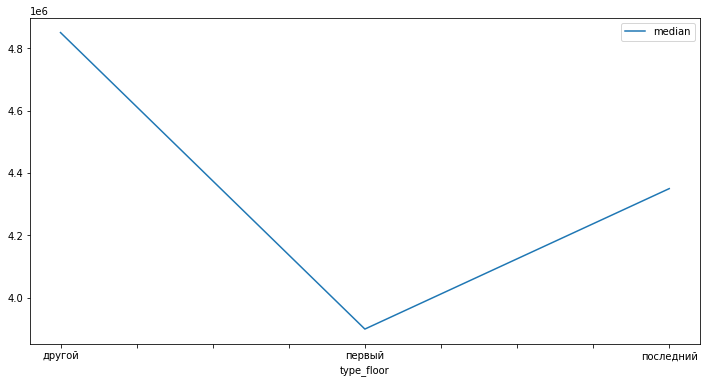

In [67]:
type_floor_pvt = data.pivot_table(index = 'type_floor', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
type_floor_pvt .columns = ['mean', 'count', 'median']
type_floor_pvt .plot(y = 'median', figsize=(12,6))
type_floor_pvt 

На первом этаже квартиры дешевле всего, выше всего цена квартир в промежутке между первым и последним этажах.

**Вывод:**

Больше всего влияют на общую (полную) стоимость объекта это площадь квартиры (общая, жилая, кухонная), немного влияет количество комнат и этаж. Лучшее время года для продажи квартиры это апрель, сентябрь и ноябрь. Каждый год рынок меняется

**4:**

**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`**.

In [68]:
locality_name_pvt = (
    data.query('locality_name != "unknown"')
    .pivot_table(index='locality_name', values = 'price_square_meter', aggfunc = ['count', 'median'])
    )
locality_name_pvt.columns = ['count', 'median']
locality_name_pvt = locality_name_pvt.sort_values(by='count', ascending=False).head(10)
locality_name_pvt

,count,median
locality_name,,
санкт-петербург,15647,104774.540
мурино,586,86250.375
кудрово,469,95588.240
шушары,439,76829.270
всеволожск,397,65789.470
пушкин,369,100000.000
колпино,338,74723.745
парголово,327,91642.860
гатчина,307,67796.610


In [69]:
print("Самая высокая стоимость квадратного метра в СПБ:", data[data['locality_name'] == 'санкт-петербург']['price_square_meter'].max())
print("Самая низкая стоимость квадратного метра в Выборге:", data[data['locality_name'] != 'выборг']['price_square_meter'].min())

Самая высокая стоимость квадратного метра в СПБ: 1907500.0
Самая низкая стоимость квадратного метра в Выборге: 111.83


*Возможно я не правильно понял задание и сделал лишнее.*

**5:**

**Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в `Санкт-Петербурге` с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.**

In [70]:
data['cityCenters_nearest_kilometer'] = data['cityCenters_nearest_kilometer'].fillna(-1)

,last_price_million
cityCenters_nearest_kilometer,
0.0,31.449116
1.0,21.206721
2.0,17.788320
3.0,11.137395
4.0,13.304280
5.0,14.455996
6.0,15.338418
7.0,14.775153
8.0,9.945147


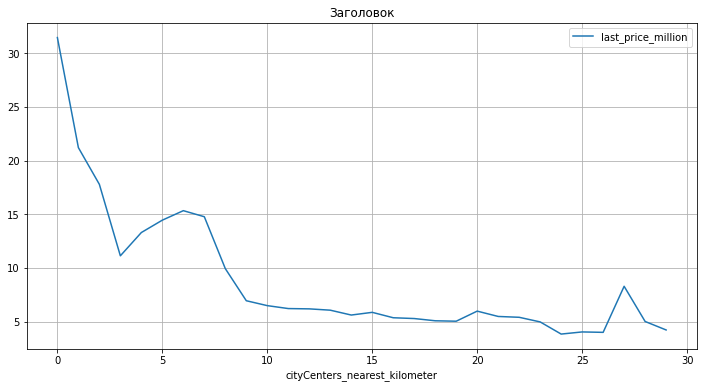

In [71]:
spb_centers_nearest = (
    data.query('locality_name == "санкт-петербург" and cityCenters_nearest_kilometer != -1')
    .pivot_table(index = 'cityCenters_nearest_kilometer', values = 'last_price_million')
    )

spb_centers_nearest.plot(grid = True, title = 'Заголовок', figsize=(12,6))
spb_centers_nearest

В самом центре (в радиусе до 1 км включительно) средняя цена на квартиру в пределах `от 20 до 30` млн.р. Если опираться на резкое падение цены по графику, то центр ограничен радиусом в `8` км с средней ценой `~10` млн.р., далее средняя цена довольно заметно падает. На расстоянии `27` км. от центра видимо находится хороший район, средняя цена(`8.3` млн.р) не намного меньше чем на окраине центра.

### Общий вывод

Данные которые изначально были нам данны, имели множество пропусков, неявных дубликатов и аномалий. Сначала я избавился от пропусков, изменил типы данных, убрал неявные дубликаты и где смог исправил аномалии.

Затем приступил к добавлению столбцов: 
- цена за квадратный метр 
- день недели, месяц и год публикации объявления
- категории по этажам квартир
- расстояние до центра города в километрах

Изучил следующие параметры и построил гистограммы:
- общая площадь
- жилая площадь
- площадь кухни
- цена объекта
- количество комнат
- высота потолков
- этаж квартиры
- тип этажа квартиры («первый», «последний», «другой»)
- общее количество этажей в доме
- расстояние до центра города в метрах
- расстояние до ближайшего аэропорта
- расстояние до ближайшего парка
- день и месяц публикации объявления

Выяснил, что больше всего влияют на общую (полную) стоимость объекта это площадь квартиры (общая, жилая, кухонная) и растояние до центра города. немного влияет количество комнат и этаж. Изучая время продажи квартир я выявил, что нормальные значения продажи квартир располагаются в промежутке от 1 до 500 дней. Незначительно на стоимость квартир влияет день публикации. Лучшее время года для продажи квартиры это апрель, сентябрь и ноябрь. Судя, по резкости изменения цен в зависимости от удаления от центра СПБ, я выявил центр города в радиусе 8 километров.

Также важно учитывать, что, рассматривая среднюю стоимость квартир в 2014-2019 годах, я не делал сегментацию рынка, а лишь смотрел средние показатели по рынку в целом. Т.е. возможно, что цены на аналогичные квартиры в разных годах вели себя абсолютно по-разному. Т.е. например в то время, когда средняя стоимость квартиры по рынку в 2016-2017 годах была наиболее низкой, какие-то аналогичные прошлым годам квартиры могли и не падать в цене, а наоборот дорожать!